Installing Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 23.3 MB/s eta 0:01:57
     ---------------------------------------- 0.0/2.7 GB 27.1 MB/s eta 0:01:41
     ---------------------------------------- 0.0/2.7 GB 28.9 MB/s eta 0:01:35
     ---------------------------------------- 0.0/2.7 GB 28.1 MB/s eta 0:01:37
     ---------------------------------------- 0.0/2.7 GB 29.2 MB/s eta 0:01:33
     ---------------------------------------- 0.0/2.7 GB 29.8 MB/s eta 0:01:32
     ---------------------------------------- 0.0/2.7 GB 29.5 MB/s eta 0:01:32
     ---------------------------------------- 0.0/2.7 GB 31.2 MB/s eta 0:01:27
     ---------------------------------------- 0.0/2.7 GB 31.1 MB/s eta 0:01:28
     ---------------------------------------- 0.0/2.7 GB 31.2 MB/s eta 0:01:27
     ---------------------------------------- 0.0/2.7 GB 31.2 MB/s eta 0:01:27
 

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

  Obtaining dependency information for gitpython>=3.1.30 from https://files.pythonhosted.org/packages/8d/c4/82b858fb6483dfb5e338123c154d19c043305b01726a67d89532b8f8f01b/GitPython-3.1.40-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python>=4.1.1 from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for Pillow>=10.0.1 from https://files.pythonhosted.org/packages/b1/38/31def4109acd4db10672df6f806b175c0d21458f845ddc0890e43238ba7c/Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for ultralytics>=8.0.147 from https://files.pythonhosted.org/packages/bd/0c/9a33eec7c8d66a29528994d0cab77f79844c0b3f5258b68481385a1540f3/ultralytics-8.0.220-py3-none-any.whl.metadata
  Obtaining dependency information for gitdb<5,>=4.0.1 from https://files.pythonhosted.org/packages/fd/5b/8f0c4a5bb9fd491c277c2

In [2]:
import torch
from matplotlib import pyplot as plt 
import numpy as np 
import cv2

# temporary fix to "libiomp5md.dll already initialized" error
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

2. Load Model

In [3]:
# Loads pre-trained ultralytics model from PyTorchHub, using smaller 's' model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Razer Blade/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-29 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


3. Make Detections (not real time, just seeing how to use our model)

In [4]:
# Initial image used for baseline detection, from Ultralytics YOLO documentation.
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
# Pass img into our model and show results.
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2207.3ms pre-process, 37.9ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


3.1 Render Results

<function matplotlib.pyplot.show(close=None, block=None)>

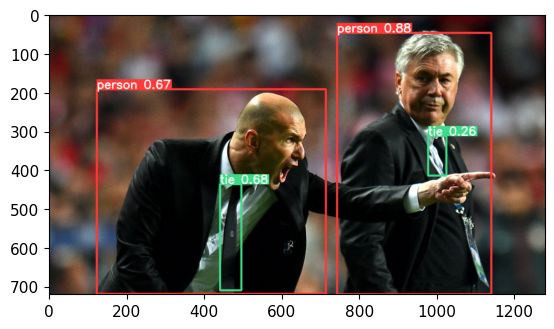

In [6]:
# use matplotlib inline to render our images inline, right here. then plt imshow()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

4. Real Time Detections with OpenCV

In [8]:
""" Gives a webcam popup for real-time feed """
# allows us to access webcam and make real-time detections throuh built in cv functions
# change the number depending on which Video Device your webcam is. Try 0 first.

# change input to VideoCapture() to mp4 file for video detection.
cap = cv2.VideoCapture(0)

# loop through webcam feed, while our webcam is still open.
while cap.isOpened():
    # .read() returns a return value but more importantly a frame from cam.
    ret, frame = cap.read()

    # our frame is a capture from our webcam. It is making continuous frame captures. 
    frame_results = model(frame) # pass in our frame into our pre-trained model to make detections

    # allows us to render our frame/image capture from webcam
    """ results.render() --> returns an image array representation of image. 
        In order to get the image detection we want, we need to pass it into
        some rendering function. We can use cv2.imshow for that. We first need
        to squeeze out the data from the larger results.render() array """
    cv2.imshow('drowsiness detection', np.squeeze(frame_results.render()))

    # Press 'q' on keyboard for exit.
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# clean up. we always want to release the webcam used
cap.release()
cv2.destroyAllWindows()

5. Train Custom YOLO Model

In [9]:
import uuid  # allows us to name images with unique identifiers
import time # can break code with specified time.

In [12]:
IMAGE_PATH = os.path.join('data', 'images') # all images will be in #/data/images

# collect two different types of images: awake and drowsy.
labels = ['awake', 'drowsy']
num_imgs = 20

In [13]:
# loop through each label, and collect images for those labels. Each time, collect num_imgs images.
cap = cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    # wait 5s between each label image collection.
    time.sleep(5)

    for i in range(num_imgs):
        print("Collecting images for {}, image number {}".format(label, i))
        ret, frame = cap.read()

        # use cap to take images and uuid for unique identifiers.
        uid = str(uuid.uuid1())
        # full filepath of our image
        imgname = os.path.join(IMAGE_PATH, label + '.' + uid + '.jpg')
        # write image to file
        cv2.imwrite(imgname, frame)

        # use imshow() to render to screen.
        cv2.imshow('Image Collection', frame)
        time.sleep(2)

        # break out of code with 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



In [14]:
# we want to now label our images, using LabelImg library from github
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [16]:
# install dependencies for lableIMG
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [17]:
# begin training
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Razer': No such file or directory
YOLOv5  2023-11-29 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

6. Load Custom Model

In [18]:
# use last.pt PyTorch weights.

# rather than passing in a pre-trained model (like yolov5s in the beginning), we will now use our custom model with our custom pytorch weights!
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Razer Blade/.cache\torch\hub\master.zip
YOLOv5  2023-11-30 Python-3.11.5 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [19]:
# load up one of our images to test our custom model. 
img = os.path.join('data', 'images', 'awake.9bb76cb1-8f5e-11ee-b6aa-c47ba3dd6946.jpg')

In [20]:
# pass in our image into our custom model
results = model(img)

In [21]:
# print results - detects awake!
results.print()

image 1/1: 480x640 1 awake
Speed: 30.9ms pre-process, 64.8ms inference, 30.9ms NMS per image at shape (1, 3, 480, 640)


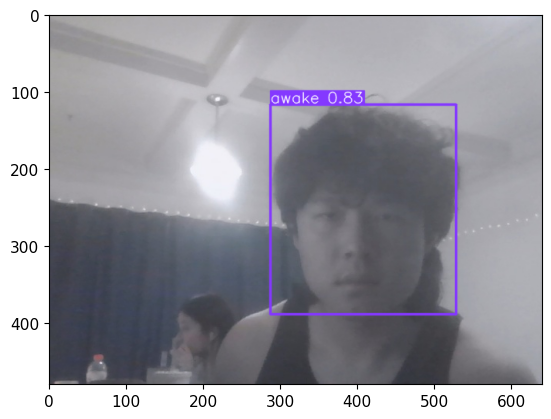

In [22]:
# render our image using plt.show for inline
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
# real time detection code using webcam

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)

    cv2.imshow("Drowsiness Detection", np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()